In [1]:
import torch

In [2]:
from facade_project import FACADE_ROT_HEATMAPS_TENSORS_DIR, FACADE_ROT_MEAN, FACADE_ROT_STD, LABEL_NAME_TO_VALUE
from facade_project.data import FacadeRandomRotDataset, split
from facade_project.data.facade_random_rot_dataset import add_heatmaps_target
from facade_project.show import *
from facade_project.nn.models import load_trained_model
from facade_project.utils import outputs_to_predictions
from facade_project.geometry.heatmap import heatmaps_to_info, info_to_mask
from facade_project.nn.metrics import accuracy_from_infos

In [3]:
device = torch.device('cuda:0')

In [4]:
model_name = '2019-06-09_04-23-45_albunet_predictions-mask1.0-heatmaps0.005'
n_epoch = 24

model = load_trained_model(model_name, n_epoch, device)

In [5]:
mean = torch.tensor(FACADE_ROT_MEAN).view(3, 1, 1).to(device)
std = torch.tensor(FACADE_ROT_STD).view(3, 1, 1).to(device)
transform=lambda img: (img - mean) / std

In [6]:
_, validation_dset = split(FacadeRandomRotDataset(
    add_targets_fn=add_heatmaps_target,
    device=device,
    img_to_num_rot=[1 for _ in range(418)] # only non rotated images
))

In [38]:
inputs, _ = validation_dset[0]

In [39]:
outputs_cpu = model(transform(inputs).unsqueeze(0))[0].detach().cpu()
inputs_cpu = inputs.cpu()  

In [32]:
def show_preds(inputs, outputs):    
    show_img(inputs)
    
    _, pred_mask = torch.max(outputs[:4], 0)
    show_labeled_img(inputs, pred_mask.unsqueeze(0))
    
    logits = outputs[:4]
    heatmaps = torch.relu(outputs[4:])
    
    show_img(heatmaps[0:1])

    pred_info = heatmaps_to_info(heatmaps, logits, 10, 1000)
    heatmaps_mask = info_to_mask(pred_info)
    show_labeled_img(inputs, heatmaps_mask)

torch.Size([768, 1024, 3])


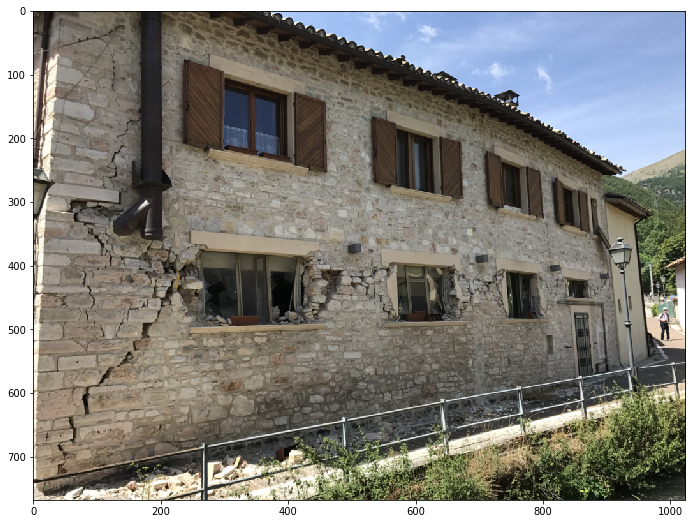

(768, 1024, 3)


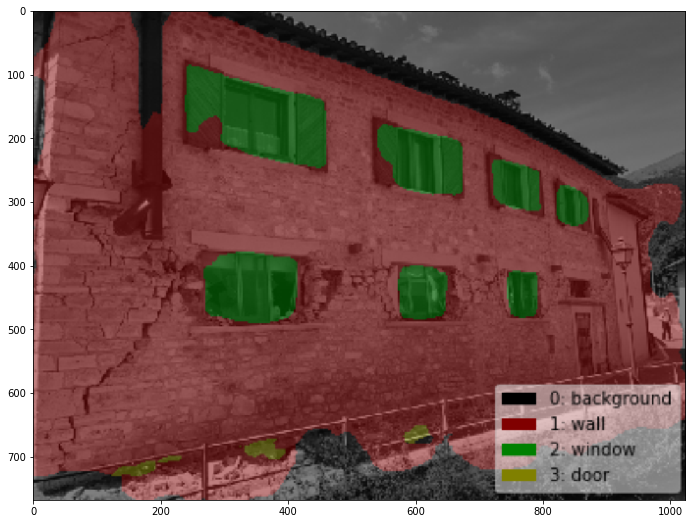

torch.Size([768, 1024, 1])


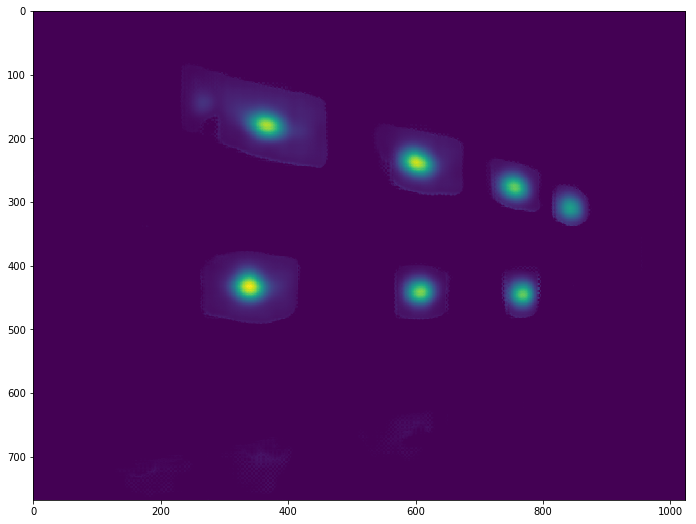

(768, 1024, 3)


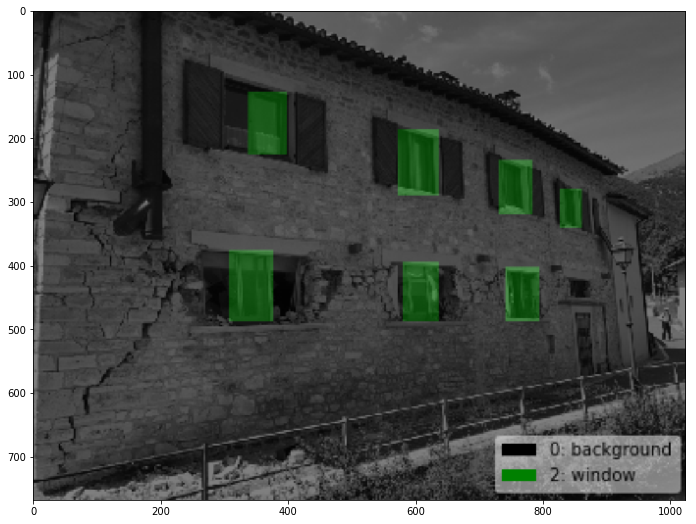

In [40]:
show_preds(inputs_cpu, outputs_cpu)